In [1]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.layers import MaxPooling2D
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
import keras
import numpy as np

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 228s 20us/step


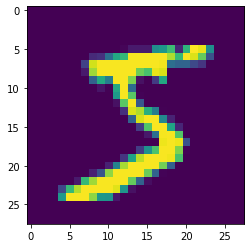

In [3]:
plt.imshow(X_train[0])

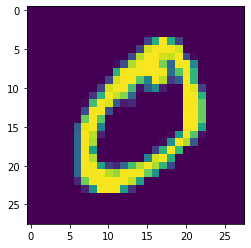

In [5]:
plt.imshow(X_train[1])

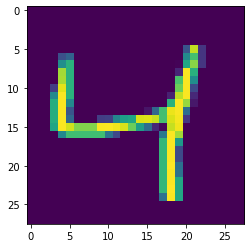

In [6]:
plt.imshow(X_train[2])

In [7]:
X_train[0].shape

(28, 28)

In [8]:
y_train[0]

5

In [9]:
X_train = X_train.reshape(60000,28,28,1)[:6000]
X_test = X_test.reshape(10000,28,28,1)[:100]

In [10]:
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:100]

In [11]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [12]:
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

W0723 20:51:35.405941  3920 deprecation_wrapper.py:119] From C:\Users\HP\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0723 20:51:36.411476  3920 deprecation_wrapper.py:119] From C:\Users\HP\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0723 20:51:36.763681  3920 deprecation_wrapper.py:119] From C:\Users\HP\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0723 20:51:37.142139  3920 deprecation_wrapper.py:119] From C:\Users\HP\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

W0723 20:52:10.815438  3920 deprecation_wrapper.py:119] From C:\Users\HP\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0723 20:52:10.854578  3920 deprecation_wrapper.py:119] From C:\Users\HP\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [14]:
model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=6)

W0723 20:52:38.266624  3920 deprecation.py:323] From C:\Users\HP\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0723 20:52:38.364734  3920 deprecation_wrapper.py:119] From C:\Users\HP\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 6000 samples, validate on 100 samples
Epoch 1/6
6000/6000 [==============================] - 15s 3ms/step - loss: 6.5641 - acc: 0.5507 - val_loss: 6.3871 - val_acc: 0.5900
Epoch 2/6
6000/6000 [==============================] - 11s 2ms/step - loss: 5.3690 - acc: 0.6465 - val_loss: 6.3333 - val_acc: 0.5900
Epoch 3/6
6000/6000 [==============================] - 11s 2ms/step - loss: 2.0527 - acc: 0.8178 - val_loss: 0.1519 - val_acc: 0.9600
Epoch 4/6
6000/6000 [==============================] - 10s 2ms/step - loss: 0.1528 - acc: 0.9577 - val_loss: 0.0393 - val_acc: 0.9900
Epoch 5/6
6000/6000 [==============================] - 11s 2ms/step - loss: 0.0782 - acc: 0.9757 - val_loss: 0.0437 - val_acc: 0.9800
Epoch 6/6
6000/6000 [==============================] - 10s 2ms/step - loss: 0.0514 - acc: 0.9830 - val_loss: 0.0217 - val_acc: 1.0000


In [15]:
test_answer=model.predict(X_test[:4])

In [16]:
real_answer=y_test[:4]

In [17]:
for i in range(len(test_answer)):
    print(np.where(test_answer[i]==max(test_answer[i])),' : ',np.where(real_answer[i]==max(real_answer[i])))

(array([7], dtype=int64),)  :  (array([7], dtype=int64),)
(array([2], dtype=int64),)  :  (array([2], dtype=int64),)
(array([1], dtype=int64),)  :  (array([1], dtype=int64),)
(array([0], dtype=int64),)  :  (array([0], dtype=int64),)
